In [ ]:
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. 
Perform following tasks: 
1.  Pre-process the dataset. 
2.  Identify outliers. 
3.  Check the correlation. 
4.  Implement linear regression and random forest regression models. 
5.  Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [5]:
# Load the dataset
data = pd.read_csv("uber_data.csv")

In [6]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
# Remove unnecessary column
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [10]:
# Handle missing values
# We can choose to drop rows with missing values or fill them with appropriate values.

data.dropna(inplace=True)

# To fill missing values with the mean value of the column:
# data.fillna(data.mean(), inplace=True)

# Ensure there are no more missing values
missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)

Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


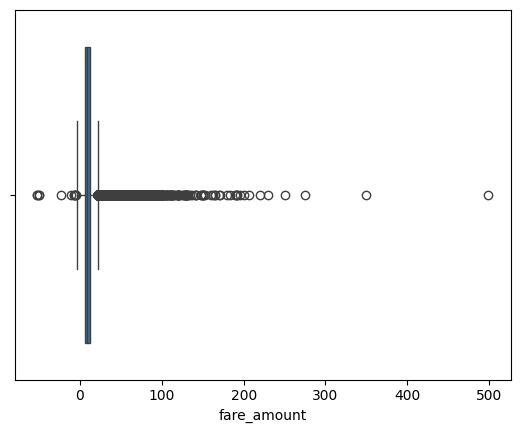

In [11]:
# 2. Identify outliers
# visualization to detect outliers.
sns.boxplot(x=data["fare_amount"])
plt.show()

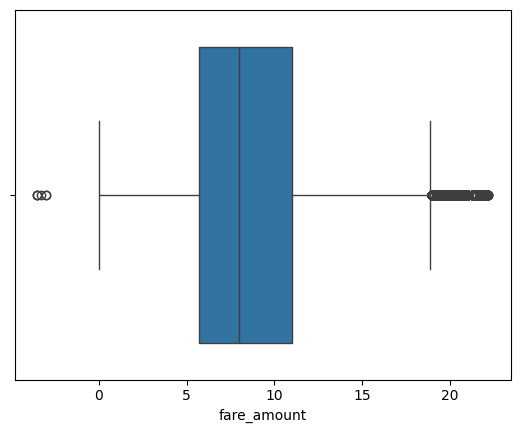

In [12]:
# Calculate the IQR for the 'fare_amount' column
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
data_no_outliers = data[(data["fare_amount"] >= lower_bound) & (data["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

Unnamed: 0              Axes(0.125,0.786098;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_longitude        Axes(0.125,0.673415;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.560732;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.560732;0.352273x0.0939024)
passenger_count         Axes(0.125,0.448049;0.352273x0.0939024)
dtype: object

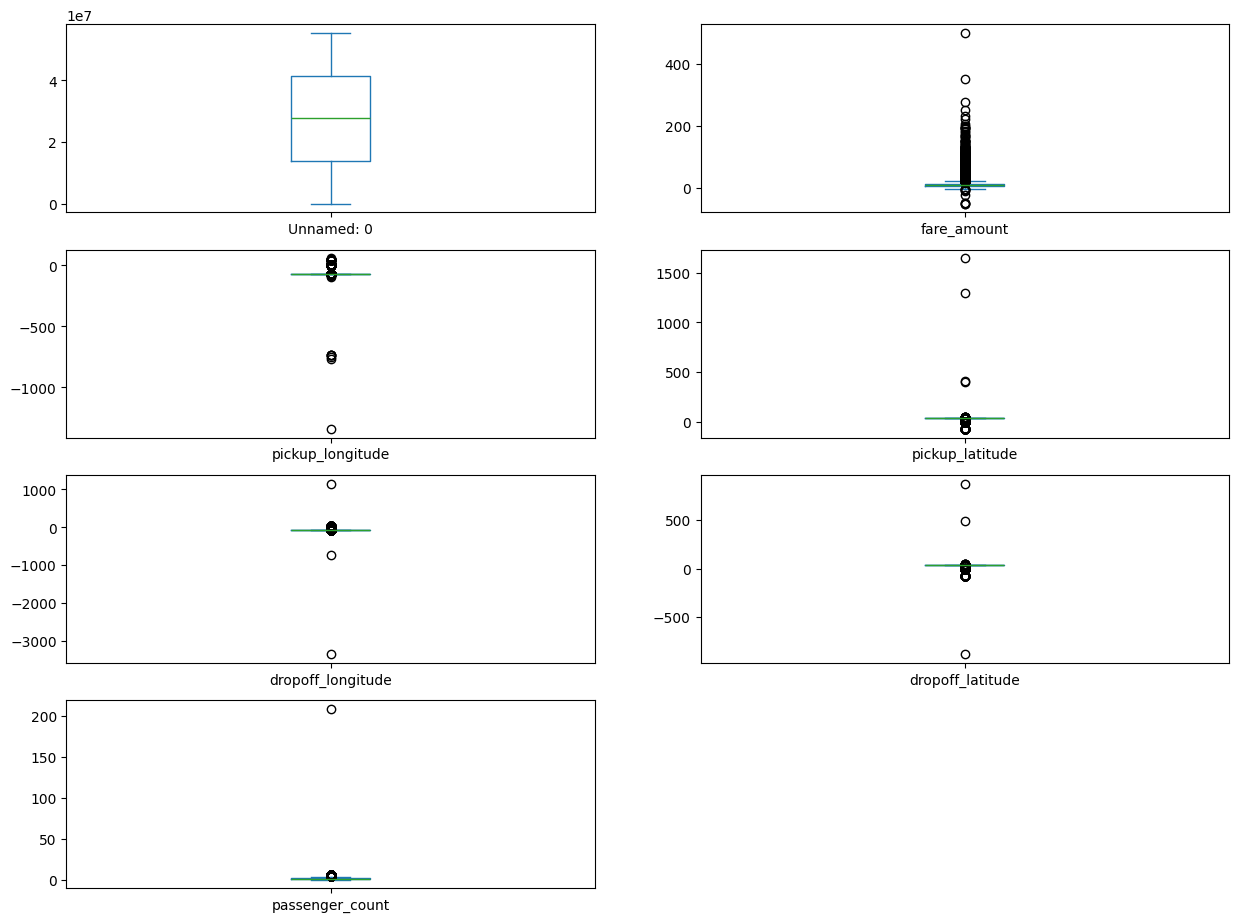

In [13]:
data.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

Unnamed: 0              Axes(0.125,0.786098;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_longitude        Axes(0.125,0.673415;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.560732;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.560732;0.352273x0.0939024)
passenger_count         Axes(0.125,0.448049;0.352273x0.0939024)
dtype: object

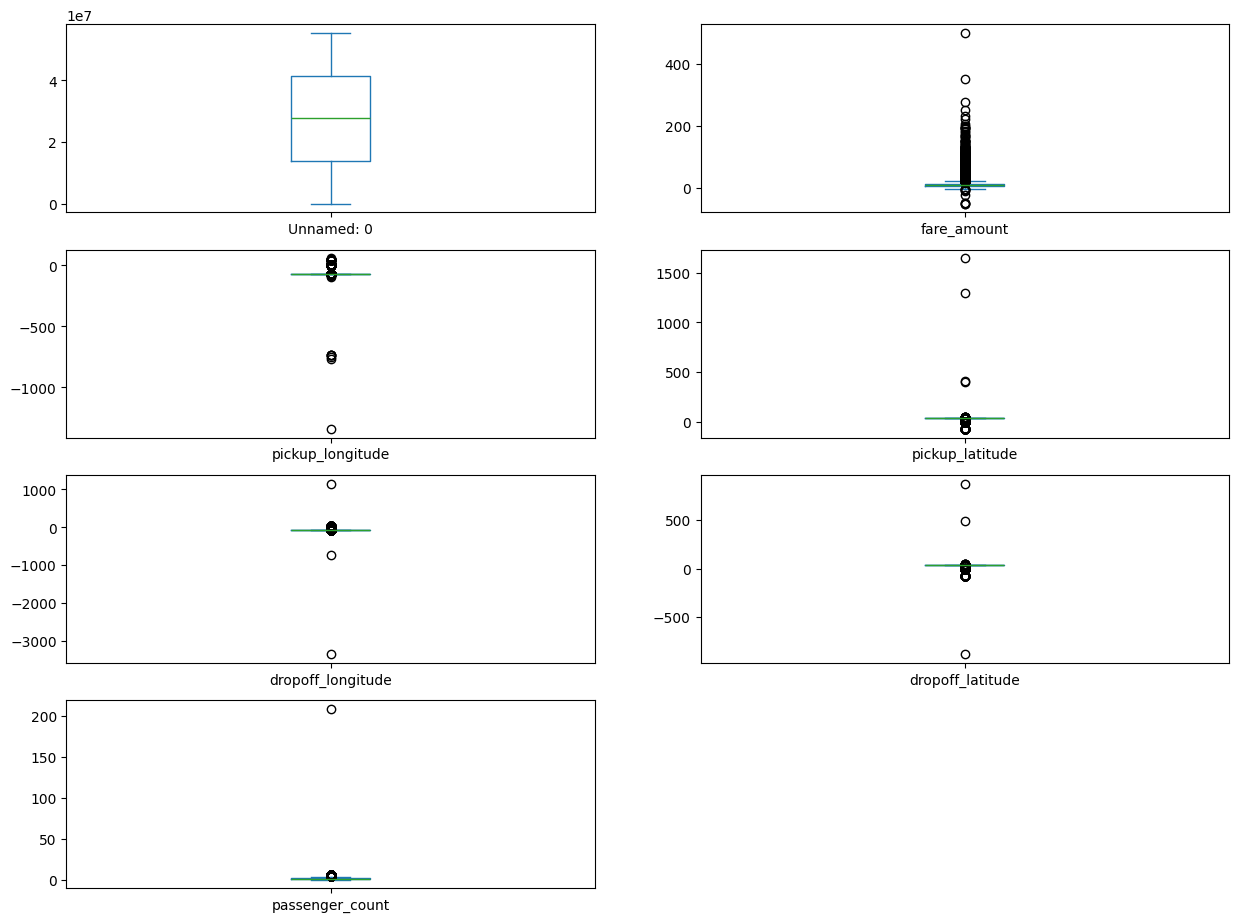

In [14]:
data.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

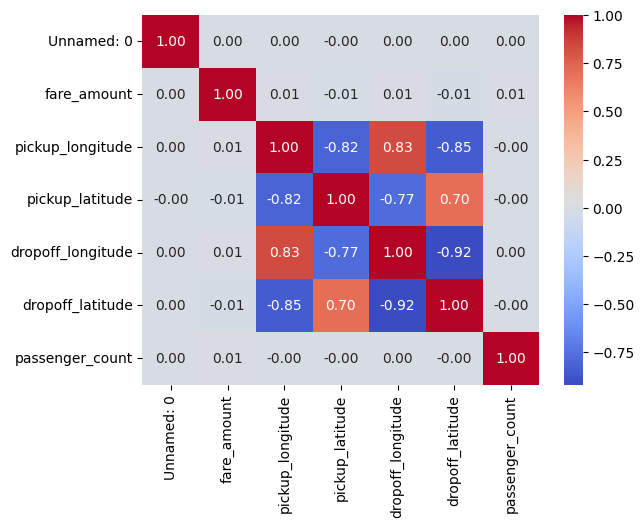

In [15]:
# Exclude non-numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()


In [16]:
# 4. Implement linear regression and random forest regression models
# Split the data into features and target variable
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']  #Target

y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Create and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# 5. Evaluate the models
# Predict the values
y_pred_lr = lr_model.predict(X_test)
y_pred_lr
print("Linear Model:",y_pred_lr)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model:", y_pred_rf)

Linear Model: [11.29237916 11.29171388 11.5718662  ... 11.29183291 11.43252639
 11.29190248]
Random Forest Model: [ 9.262   5.043  12.547  ...  6.8087 11.279   8.315 ]


In [21]:
# Compare the scores
print("Linear Regression - R2:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)

NameError: name 'r2_lr' is not defined

In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression R2:", r2_rf)
print("Random Forest Regression RMSE:",rmse_rf)